docker run -it --rm --runtime=nvidia -p 8888:8888 tensorflow/tensorflow:latest-gpu-jupyter

https://docs.arduino.cc/tutorials/nano-33-ble-sense-rev2/get-started-with-machine-learning/

https://github.com/tensorflow/tflite-micro-arduino-examples
 

In [17]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from som import Som

In [18]:
print(tf.config.list_physical_devices('GPU'))

[]


In [19]:
df = pd.read_csv('test_data.csv')
df

,init,result
0,-0.868245,-0.654525
1,0.866917,0.651528
2,-0.102037,-0.001062
3,0.602888,0.219135
4,0.838314,0.589141
...,...,...
2995,-0.181318,-0.005961
2996,0.314093,0.030987
2997,-0.313361,-0.030771
2998,0.144365,0.003009


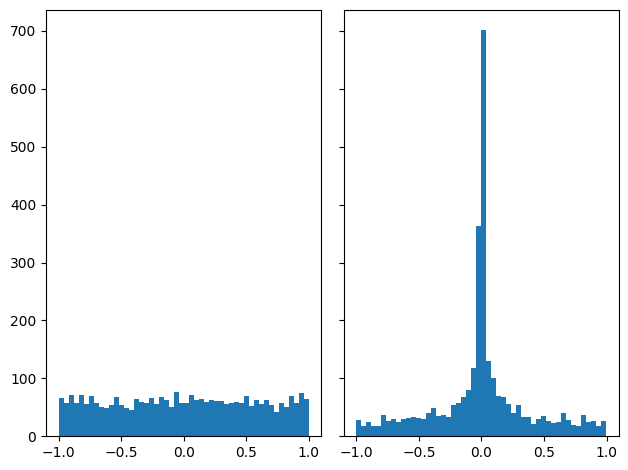

In [20]:
n_bins = 50

_, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(df['init'], bins=n_bins)
axs[1].hist(df['result'], bins=n_bins)

plt.show()

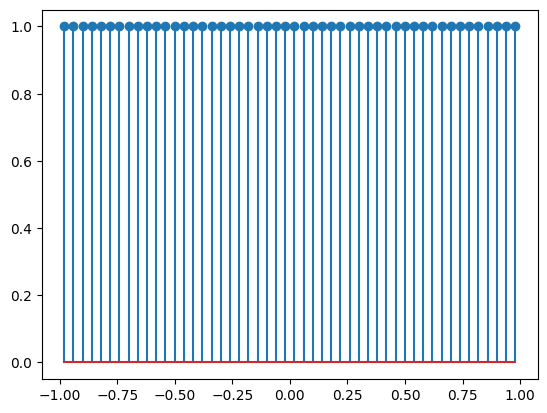

In [21]:
som = Som(50, df['init'].min(), df['init'].max())
stem_x_values = som.get_as_matrix()[:, 0]
stem_y_values = som.get_as_matrix()[:, 1]

plt.stem(stem_x_values, stem_y_values)
plt.show()

In [22]:
som.fit(df['result'])
som.print_nodes()

SomeNode: weight_pos=-0.8621363319894493, weight_amount=102.95760730005718, previous=None, next=-0.8004899776316133
SomeNode: weight_pos=-0.8004899776316133, weight_amount=101.41521460011467, previous=-0.8621363319894493, next=-0.7480462380832259
SomeNode: weight_pos=-0.7480462380832259, weight_amount=109.58042920022952, previous=-0.8004899776316133, next=-0.6970898552891504
SomeNode: weight_pos=-0.6970898552891504, weight_amount=109.03585840045933, previous=-0.7480462380832259, next=-0.6456349983743626
SomeNode: weight_pos=-0.6456349983743626, weight_amount=111.50921680091867, previous=-0.6970898552891504, next=-0.5956118501980114
SomeNode: weight_pos=-0.5956118501980114, weight_amount=112.23718360183733, previous=-0.6456349983743626, next=-0.5522231439683924
SomeNode: weight_pos=-0.5522231439683924, weight_amount=111.58374220367466, previous=-0.5956118501980114, next=-0.5084804546275125
SomeNode: weight_pos=-0.5084804546275125, weight_amount=119.72217190734932, previous=-0.5522231439

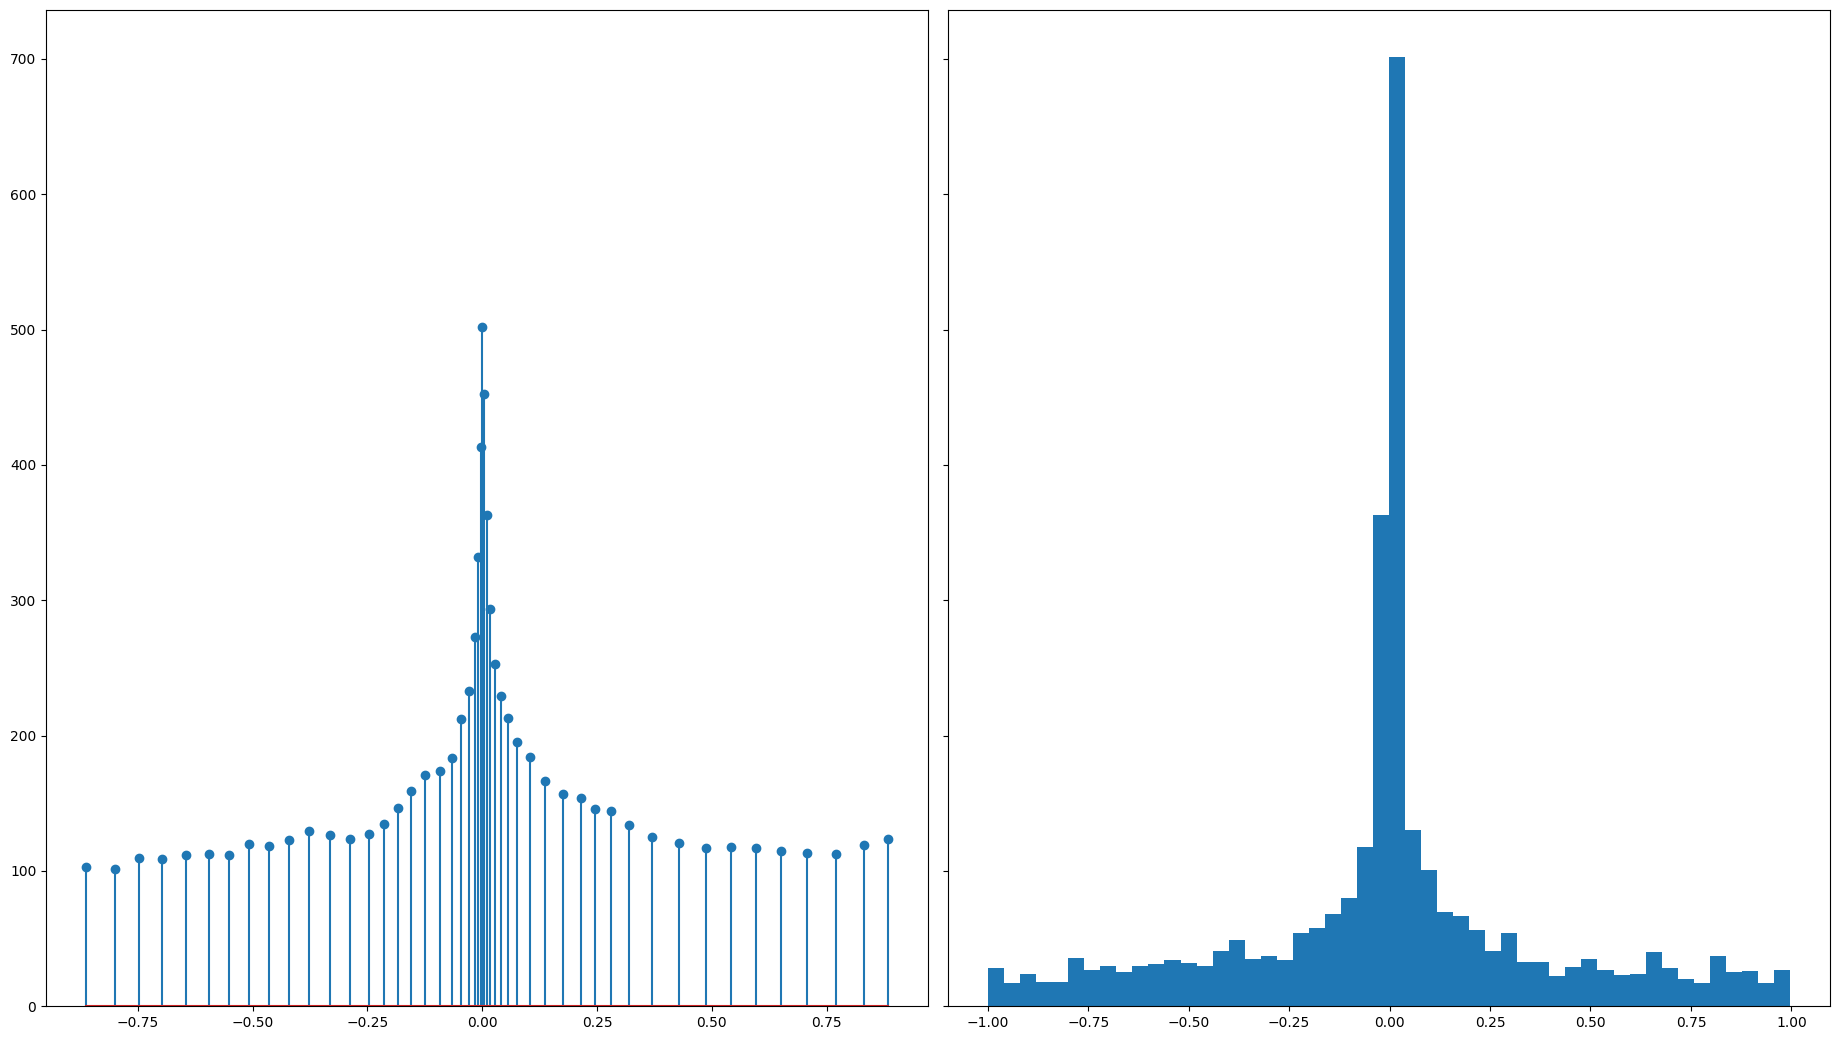

In [23]:
stem_x_values = som.get_as_matrix()[:, 0]
stem_y_values = som.get_as_matrix()[:, 1]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.set_size_inches(18.5, 10.5, forward=True)
# We can set the number of bins with the *bins* keyword argument.
axs[0].stem(stem_x_values, stem_y_values)
axs[1].hist(df['result'], bins=n_bins)
plt.show()

In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

C:\Users\Fabian\DataspellProjects\spicenet-embedded\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2818441 , -0.01215675, -0.01693099,  0.37518317,  0.17163976,
         0.89590454,  0.13698432, -0.2459481 , -0.31790292,  0.39672875]],
      dtype=float32)

In [27]:
tf.nn.softmax(predictions).numpy()


array([[0.10577365, 0.07883055, 0.07845508, 0.11612189, 0.09473629,
        0.1954612 , 0.0915094 , 0.0623965 , 0.05806449, 0.11865096]],
      dtype=float32)

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.6323935

In [29]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [30]:
callback = keras.callbacks.EarlyStopping(monitor='loss',
                                         patience=3)

model.fit(x_train, y_train, epochs=5, callbacks=[callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8632 - loss: 0.4688
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9571 - loss: 0.1453
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9677 - loss: 0.1065
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0833
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9777 - loss: 0.0711


In [31]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9756 - loss: 0.0815


[0.08152452111244202, 0.975600004196167]